In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from src.utils import GetSortedSpeciesCode

In [14]:
TARGET_SPECIES = GetSortedSpeciesCode(Path.cwd().parent.parent.joinpath('setting', 'SPECIES.csv'))
plotDim = int(np.ceil(np.sqrt(len(TARGET_SPECIES))))

## Scatter Plots

In [15]:
countDF = pd.read_csv(
  Path.cwd().parent.parent.joinpath('report', 'table', 'songCount.csv'), 
  header=[0, 1], index_col=0
)
countDF.columns.set_names(['species', 'dimension'], inplace=True)
countDF = countDF.T

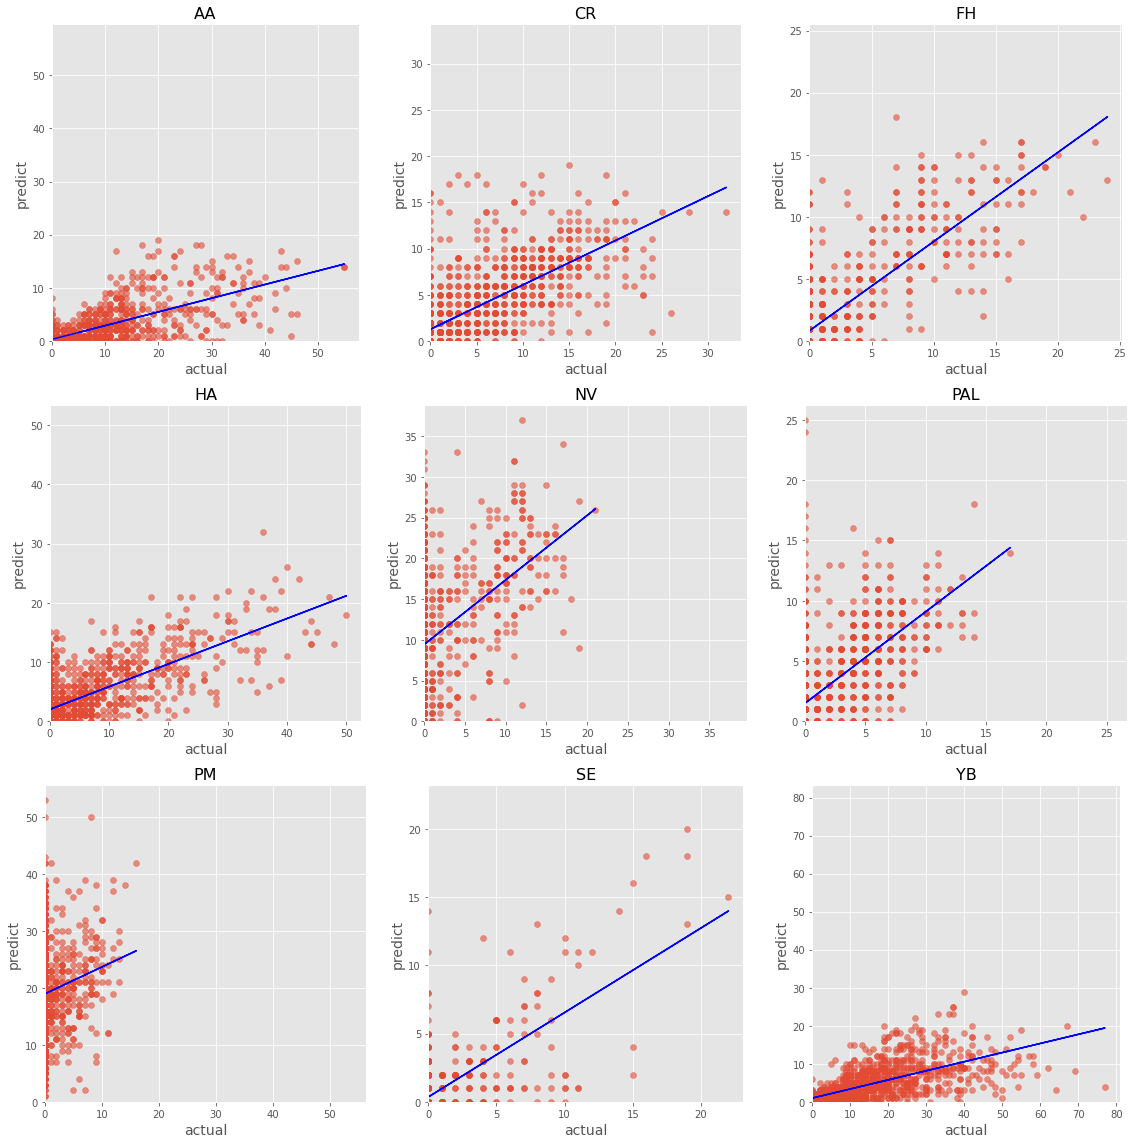

In [16]:
fig, axs = plt.subplots(plotDim, plotDim, figsize=(16, 16), tight_layout=True)
axs = axs.flatten()
for i, sp in enumerate(TARGET_SPECIES):
  actuals = countDF.xs(sp, level='species').T.loc[:, 'actual'].tolist()
  predicts = countDF.xs(sp, level='species').T.loc[:, 'predict'].tolist()
  regreLineFunc = np.poly1d(np.polyfit(actuals, predicts, 1))
  axs[i].scatter(actuals, predicts, cmap='r', alpha=0.6)
  axs[i].plot(actuals, regreLineFunc(actuals), '-b')
  axs[i].axis('square')
  axs[i].set_xlim(left=0)
  axs[i].set_ylim(bottom=0)
  axs[i].set_title(sp, fontsize=16)
  axs[i].set_ylabel('predict', fontsize=14)
  axs[i].set_xlabel('actual', fontsize=14)